In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("../../images/sudoku.png", 0)

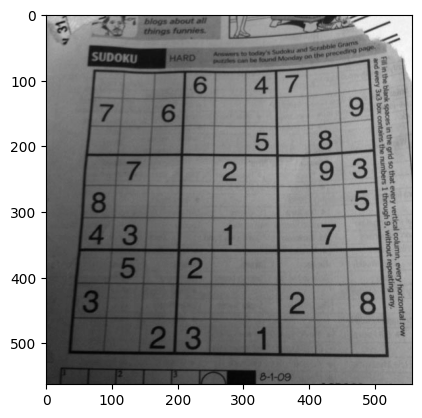

In [3]:
plt.imshow(img, "gray")

### Umbralización global

Text(0.5, 1.0, '96.0')

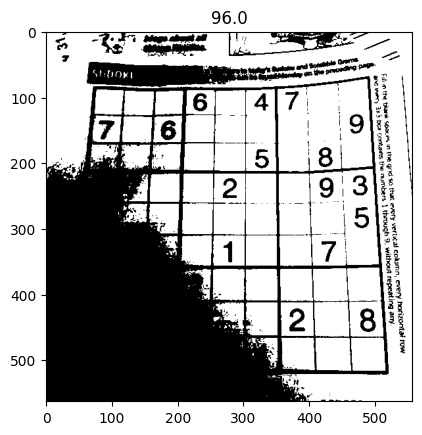

In [13]:
UMBRAL = 255
img_bin = cv.threshold(img, UMBRAL, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(img_bin[1], "gray", vmin=0)
plt.title(f"{img_bin[0]}")

### Umbralización adaptiva

In [47]:
img_bin_adap = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

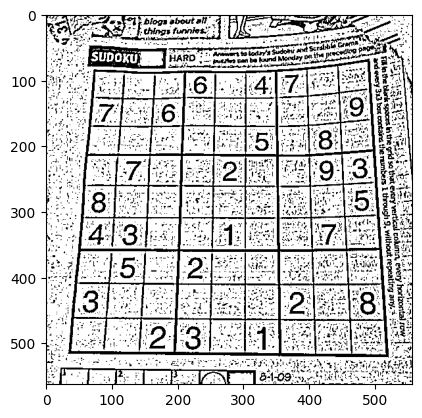

In [48]:
plt.imshow(img_bin_adap, "gray")

### Componentes conectados

In [49]:
blob = cv.imread("../../images/detect_blob.png", 0)
blob_bin = cv.threshold(blob, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

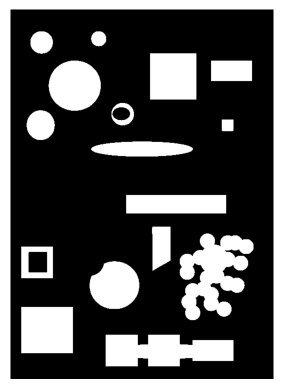

In [51]:
plt.imshow(blob_bin, "gray")
plt.axis("off")
plt.show()

In [55]:
# apply connected component analysis to the thresholded image
output = cv.connectedComponentsWithStats(blob_bin)
(numLabels, labels, stats, centroids) = output

In [60]:
numLabels

18

In [73]:
# loop over the number of unique connected component labels
output = blob_bin.copy()
output = cv.cvtColor(output, cv.COLOR_GRAY2BGR)

for i in range(1, numLabels):	
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv.CC_STAT_LEFT]
	y = stats[i, cv.CC_STAT_TOP]
	w = stats[i, cv.CC_STAT_WIDTH]
	h = stats[i, cv.CC_STAT_HEIGHT]
	area = stats[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids[i]
	print(f"ancho = {w}, alto = {h}, area = {area}")
	
	cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

ancho = 541, alto = 760, area = 2059
ancho = 46, alto = 46, area = 1683
ancho = 31, alto = 31, area = 758
ancho = 95, alto = 95, area = 9025
ancho = 107, alto = 103, area = 8695
ancho = 84, alto = 42, area = 3528
ancho = 46, alto = 46, area = 938
ancho = 58, alto = 61, area = 2778
ancho = 24, alto = 24, area = 574
ancho = 209, alto = 31, area = 5145
ancho = 205, alto = 38, area = 7790
ancho = 38, alto = 91, area = 2982
ancho = 151, alto = 178, area = 15021
ancho = 65, alto = 65, area = 2631
ancho = 102, alto = 98, area = 7682
ancho = 106, alto = 95, area = 10070
ancho = 262, alto = 65, area = 13452


In [71]:
output.shape

(760, 541, 3)

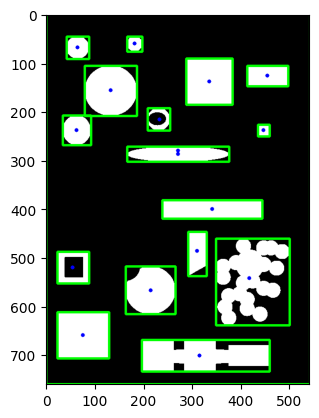

In [72]:
plt.imshow(output, "gray")